Basic MLP with MNIST data
===========

Import pakages
-----

In [1]:
!pip install numpy
!pip install matplotlib
!pip install sklearn
!pip install torch
!pip install tensorflow
!pip install torchsummary


[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: C:\Users\user\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: C:\Users\user\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: C:\Users\user\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


  Using cached sklearn-0.0-py2.py3-none-any.whl
     ---------------------------------------- 7.3/7.3 MB 10.4 MB/s eta 0:00:00



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: C:\Users\user\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


     -------------------------------------- 455.9/455.9 MB 1.4 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 7.6 MB/s eta 0:00:00
     ---------------------------------------- 5.9/5.9 MB 10.4 MB/s eta 0:00:00
     -------------------------------------- 438.7/438.7 kB 2.5 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\Users\\user\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python38\\site-packages\\tensorflow\\include\\external\\com_github_grpc_grpc\\src\\core\\ext\\filters\\client_channel\\lb_policy\\grpclb\\client_load_reporting_filter.h'
HINT: This error might have occurred since this system does not have Windows Long Path support enabled. You can find information on how to enable this at https://pip.pypa.io/warnings/enable-long-paths


[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: C:\Users\user\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully uninstalled flatbuffers-1.12
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from torch import nn
from torchsummary import summary as summary_

Download datas
-----

In [2]:
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)

In [3]:
print(mnist.data[0])
print(type(mnist.data[0]))

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.   0.   0.   0.
   0. 

In [4]:
print(mnist.target[0])
print(type(mnist.target[0]))

5
<class 'str'>


Preprocess datas
----

In [5]:
mnist.target = mnist.target.astype(np.int8) # Target이 지금 'str'형으로 되어 있는데 이를 'int'형으로 바꿈

In [6]:
X = mnist.data / 255  # 0-255값을 [0,1] 구간으로 정규화
y = mnist.target

이 이미지 데이터의 레이블은 5이다


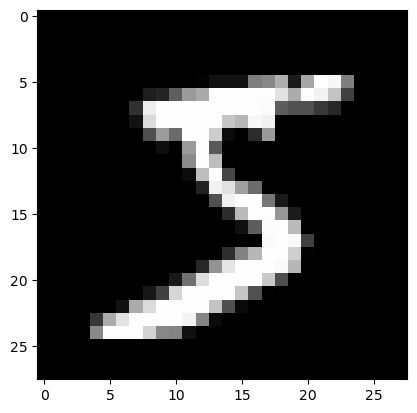

In [7]:
plt.imshow(X[0].reshape(28, 28), cmap='gray')
print("이 이미지 데이터의 레이블은 {:.0f}이다".format(y[0]))

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, random_state=0)

X_train = torch.Tensor(X_train)
X_test = torch.Tensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

ds_train = TensorDataset(X_train, y_train)
ds_test = TensorDataset(X_test, y_test)

loader_train = DataLoader(ds_train, batch_size=64, shuffle=True)
loader_test = DataLoader(ds_test, batch_size=64, shuffle=False)

In [9]:
model = nn.Sequential()
model.add_module('fc1', nn.Linear(28*28*1, 100))
model.add_module('relu1', nn.ReLU())
model.add_module('fc2', nn.Linear(100, 25))
model.add_module('relu2', nn.ReLU())
model.add_module('fc3', nn.Linear(25, 10))

summary_(model,input_size=(28*28,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 100]          78,500
              ReLU-2                  [-1, 100]               0
            Linear-3                   [-1, 25]           2,525
              ReLU-4                   [-1, 25]               0
            Linear-5                   [-1, 10]             260
Total params: 81,285
Trainable params: 81,285
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.31
Estimated Total Size (MB): 0.32
----------------------------------------------------------------


In [10]:
from torch import optim

# 오차함수 선택
loss_fn = nn.CrossEntropyLoss()

# 가중치를 학습하기 위한 최적화 기법 선택
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [11]:
def train(epoch):
    model.train()  # 신경망을 학습 모드로 전환

    # 데이터로더에서 미니배치를 하나씩 꺼내 학습을 수행
    for data, targets in loader_train:

        optimizer.zero_grad()  # 경사를 0으로 초기화
        outputs = model(data)  # 데이터를 입력하고 출력을 계산
        loss = loss_fn(outputs, targets)  # 출력과 훈련 데이터 정답 간의 오차를 계산
        loss.backward()  # 오차를 역전파 계산
        optimizer.step()  # 역전파 계산한 값으로 가중치를 수정

    print("epoch{}：완료\n".format(epoch))

In [12]:
def test():
    model.eval()  # 신경망을 추론 모드로 전환
    correct = 0

    # 데이터로더에서 미니배치를 하나씩 꺼내 추론을 수행
    with torch.no_grad():  # 추론 과정에는 미분이 필요없음
        for data, targets in loader_test:

            outputs = model(data)  # 데이터를 입력하고 출력을 계산

            # 추론 계산
            _, predicted = torch.max(outputs.data, 1)  # 확률이 가장 높은 레이블이 무엇인지 계산
            correct += predicted.eq(targets.data.view_as(predicted)).sum()  # 정답과 일치한 경우 정답 카운트를 증가

    # 정확도 출력
    data_num = len(loader_test.dataset)  # 데이터 총 건수
    print('\n테스트 데이터에서 예측 정확도: {}/{} ({:.2f}%)\n'.format(correct,
                                                   data_num, 100. * float(correct) / float(data_num)))
    return float(correct) / float(data_num)

In [13]:
test()



테스트 데이터에서 예측 정확도: 1142/10000 (11.42%)



0.1142

In [14]:
acc = []
MAX_ITERATION=20
for epoch in range(MAX_ITERATION):
    train(epoch)
    acc.append(test())


epoch0：완료


테스트 데이터에서 예측 정확도: 9541/10000 (95.41%)

epoch1：완료


테스트 데이터에서 예측 정확도: 9549/10000 (95.49%)

epoch2：완료


테스트 데이터에서 예측 정확도: 9597/10000 (95.97%)

epoch3：완료


테스트 데이터에서 예측 정확도: 9665/10000 (96.65%)

epoch4：완료


테스트 데이터에서 예측 정확도: 9604/10000 (96.04%)

epoch5：완료


테스트 데이터에서 예측 정확도: 9610/10000 (96.10%)

epoch6：완료


테스트 데이터에서 예측 정확도: 9590/10000 (95.90%)

epoch7：완료


테스트 데이터에서 예측 정확도: 9664/10000 (96.64%)

epoch8：완료


테스트 데이터에서 예측 정확도: 9657/10000 (96.57%)

epoch9：완료


테스트 데이터에서 예측 정확도: 9618/10000 (96.18%)

epoch10：완료


테스트 데이터에서 예측 정확도: 9652/10000 (96.52%)

epoch11：완료


테스트 데이터에서 예측 정확도: 9641/10000 (96.41%)

epoch12：완료


테스트 데이터에서 예측 정확도: 9659/10000 (96.59%)

epoch13：완료


테스트 데이터에서 예측 정확도: 9673/10000 (96.73%)

epoch14：완료


테스트 데이터에서 예측 정확도: 9598/10000 (95.98%)

epoch15：완료


테스트 데이터에서 예측 정확도: 9685/10000 (96.85%)

epoch16：완료


테스트 데이터에서 예측 정확도: 9686/10000 (96.86%)

epoch17：완료


테스트 데이터에서 예측 정확도: 9664/10000 (96.64%)

epoch18：완료


테스트 데이터에서 예측 정확도: 9673/10000 (96.73%)

epoch19：완료


테스트 데이터에서

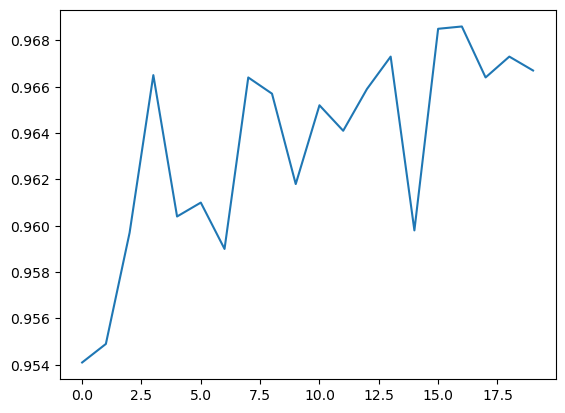

In [15]:
plt.plot(acc)

Model with Batch Normalization
=====


In [16]:
model_b = nn.Sequential()
model_b.add_module('fc1', nn.Linear(28*28*1, 100))
model_b.add_module('bn1', torch.nn.BatchNorm1d(100))
model_b.add_module('relu1', nn.ReLU())
model_b.add_module('fc2', nn.Linear(100, 25))
model_b.add_module('bn2', torch.nn.BatchNorm1d(25))
model_b.add_module('relu2', nn.ReLU())
model_b.add_module('fc3', nn.Linear(25, 10))

summary_(model_b,input_size=(28*28,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 100]          78,500
       BatchNorm1d-2                  [-1, 100]             200
              ReLU-3                  [-1, 100]               0
            Linear-4                   [-1, 25]           2,525
       BatchNorm1d-5                   [-1, 25]              50
              ReLU-6                   [-1, 25]               0
            Linear-7                   [-1, 10]             260
Total params: 81,535
Trainable params: 81,535
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.31
Estimated Total Size (MB): 0.32
----------------------------------------------------------------


In [17]:
# 오차함수 선택
loss_fn_b = nn.CrossEntropyLoss()

# 가중치를 학습하기 위한 최적화 기법 선택
optimizer_b = optim.Adam(model_b.parameters(), lr=0.01)

In [18]:
def train_b(epoch):
    model_b.train()  # 신경망을 학습 모드로 전환

    # 데이터로더에서 미니배치를 하나씩 꺼내 학습을 수행
    for data, targets in loader_train:

        optimizer_b.zero_grad()  # 경사를 0으로 초기화
        outputs = model_b(data)  # 데이터를 입력하고 출력을 계산
        loss3 = loss_fn_b(outputs, targets)  # 출력과 훈련 데이터 정답 간의 오차를 계산
        loss3.backward()  # 오차를 역전파 계산
        optimizer_b.step()  # 역전파 계산한 값으로 가중치를 수정

    print("epoch{}：완료\n".format(epoch))

In [19]:
def test_b():
    model_b.eval()  # 신경망을 추론 모드로 전환
    correct = 0

    # 데이터로더에서 미니배치를 하나씩 꺼내 추론을 수행
    with torch.no_grad():  # 추론 과정에는 미분이 필요없음
        for data, targets in loader_test:

            outputs = model_b(data)  # 데이터를 입력하고 출력을 계산

            # 추론 계산
            _, predicted = torch.max(outputs.data, 1)  # 확률이 가장 높은 레이블이 무엇인지 계산
            correct += predicted.eq(targets.data.view_as(predicted)).sum()  # 정답과 일치한 경우 정답 카운트를 증가

    # 정확도 출력
    data_num = len(loader_test.dataset)  # 데이터 총 건수
    print('\n테스트 데이터에서 예측 정확도: {}/{} ({:.2f}%)\n'.format(correct,
                                                   data_num, 100. * correct / data_num))
    
    return float(correct) / float(data_num)

In [20]:
test_b()


테스트 데이터에서 예측 정확도: 1013/10000 (10.13%)



0.1013

epoch0：완료


테스트 데이터에서 예측 정확도: 9641/10000 (96.41%)

epoch1：완료


테스트 데이터에서 예측 정확도: 9705/10000 (97.05%)

epoch2：완료


테스트 데이터에서 예측 정확도: 9723/10000 (97.23%)

epoch3：완료


테스트 데이터에서 예측 정확도: 9749/10000 (97.49%)

epoch4：완료


테스트 데이터에서 예측 정확도: 9732/10000 (97.32%)

epoch5：완료


테스트 데이터에서 예측 정확도: 9726/10000 (97.26%)

epoch6：완료


테스트 데이터에서 예측 정확도: 9756/10000 (97.56%)

epoch7：완료


테스트 데이터에서 예측 정확도: 9762/10000 (97.62%)

epoch8：완료


테스트 데이터에서 예측 정확도: 9767/10000 (97.67%)

epoch9：완료


테스트 데이터에서 예측 정확도: 9760/10000 (97.60%)

epoch10：완료


테스트 데이터에서 예측 정확도: 9791/10000 (97.91%)

epoch11：완료


테스트 데이터에서 예측 정확도: 9749/10000 (97.49%)

epoch12：완료


테스트 데이터에서 예측 정확도: 9740/10000 (97.40%)

epoch13：완료


테스트 데이터에서 예측 정확도: 9770/10000 (97.70%)

epoch14：완료


테스트 데이터에서 예측 정확도: 9772/10000 (97.72%)

epoch15：완료


테스트 데이터에서 예측 정확도: 9778/10000 (97.78%)

epoch16：완료


테스트 데이터에서 예측 정확도: 9783/10000 (97.83%)

epoch17：완료


테스트 데이터에서 예측 정확도: 9777/10000 (97.77%)

epoch18：완료


테스트 데이터에서 예측 정확도: 9779/10000 (97.79%)

epoch19：완료


테스트 데이터에서

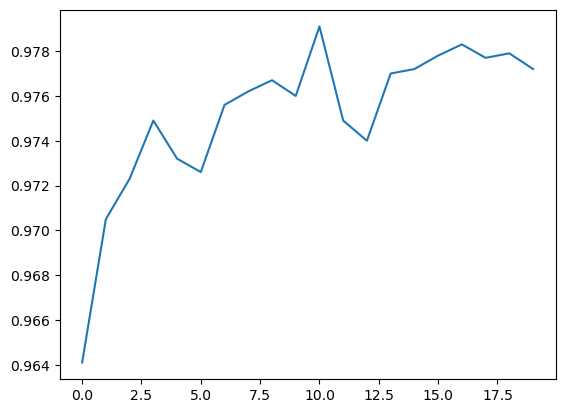

In [21]:
acc_b = []

for epoch in range(MAX_ITERATION):
    train_b(epoch)
    acc_b.append(test_b())

plt.plot(acc_b)

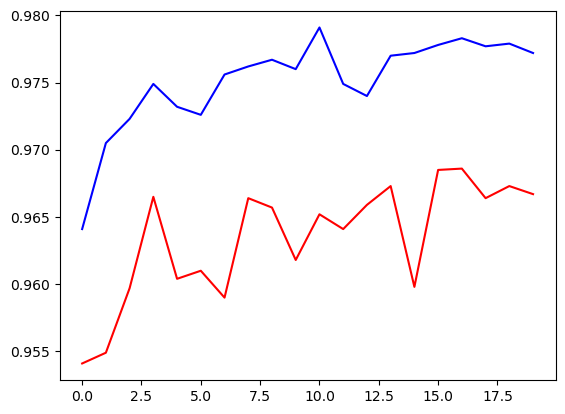

In [22]:
T = np.arange(MAX_ITERATION)
plt.plot(T, acc, 'r', T, acc_b, 'b')